In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

In [69]:
#Configurando Pandas 
pd.set_option('display.max_columns',None)

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

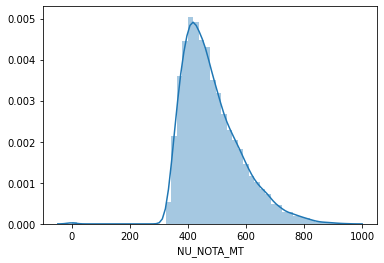

In [6]:
nota_mt = train['NU_NOTA_MT']
sns.distplot(train['NU_NOTA_MT'])

In [7]:
print(f'Skweness : {nota_mt.skew()}')
print(f'Kurtosis: {nota_mt.kurt()}')

Skweness : 0.9206896733932955
Kurtosis: 1.4225025820577502


### FINDING COLUMNS WITH NUNIQUE == 1 AND DROPING

In [9]:
columns_drop = list(train.loc[0,train.nunique() == 1].index)
nu_drops = len(columns_drop)
train.drop(columns=columns_drop,inplace=True)
print(f' Number of Columns to drop: {nu_drops}')

 Number of Columns to drop: 24


### CATEGORICAL AND NUMERICAL FEATURES

In [67]:
cat_feat = train.select_dtypes(include={'object'}).copy()
num_feat = train.select_dtypes(include={'int64','float64'}).copy()

### FINDING THE MOST CORRELATED FEATURES WITH NOTA_MT

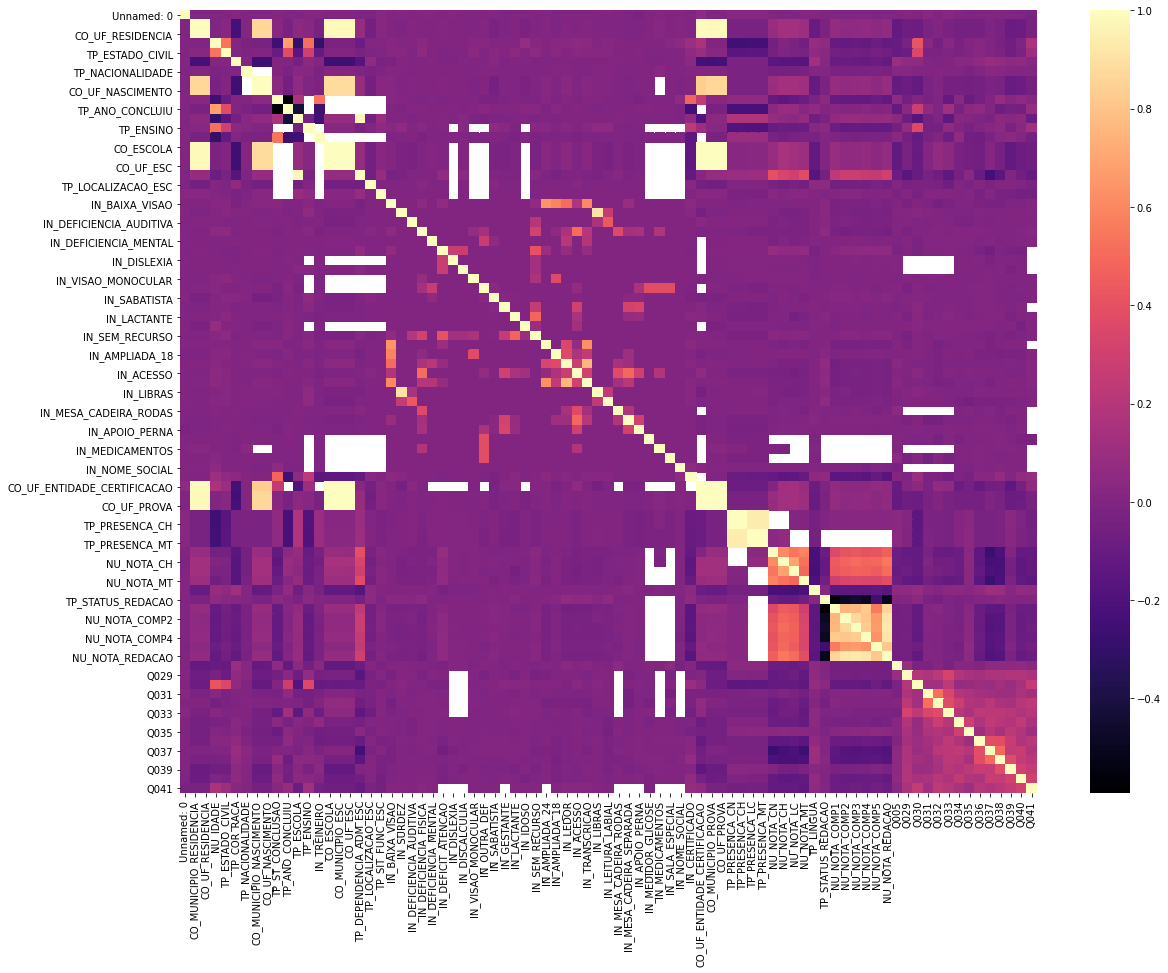

In [12]:
# Building the correlation matrix
correMat = num_feat.corr()
# Configuring the figsize
f, ax = plt.subplots(figsize=(12*1.6,9*1.6))
# Ploting the heatmap
sns.heatmap(correMat,cmap='magma')

In [13]:
notaMT = pd.DataFrame(correMat.loc['NU_NOTA_MT'])
#sns.lineplot(x = notaMT.columns, y=notaMT.loc[notaMT.index,:])
notaMT.loc[notaMT['NU_NOTA_MT'] < -0.2 ,:]

,NU_NOTA_MT
TP_LINGUA,-0.201726
Q037,-0.265249
Q038,-0.202259


### TREATING NUMERICAL FEATURES

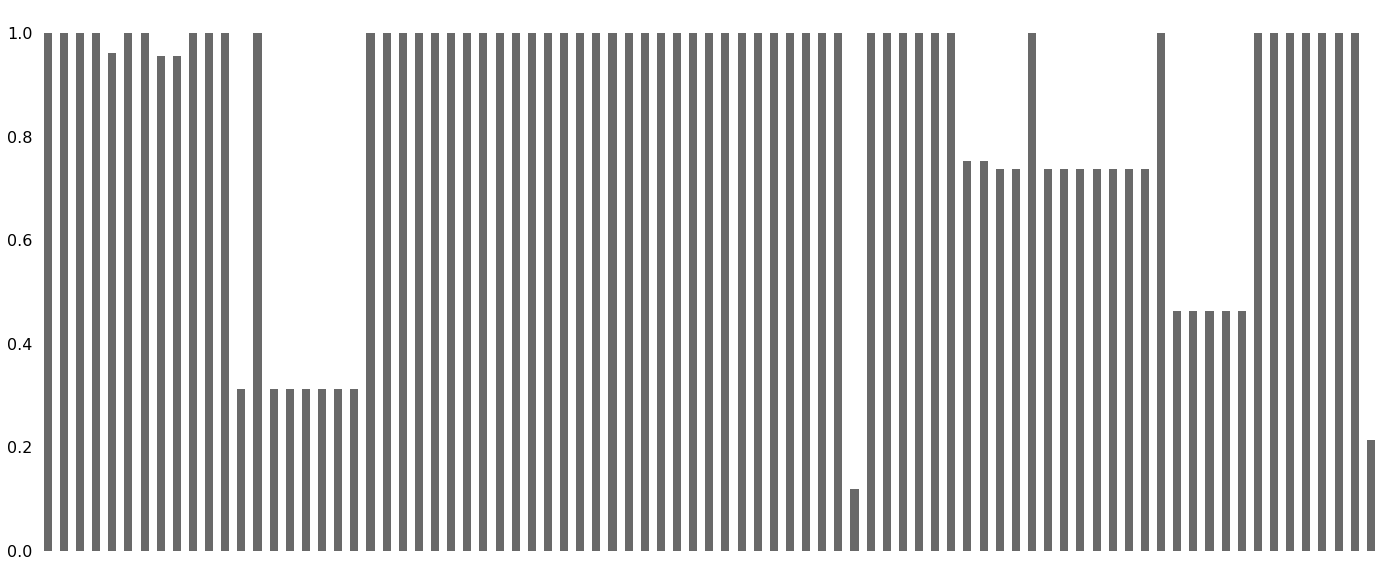

In [20]:
# Finding missing values
msn.bar(num_feat)

In [70]:
# Droping columns with more than 60% missing values
porc = .6 * num_feat.shape[0]
colum_drops = list(num_feat.loc[:,list(num_feat.isnull().sum() > porc)].columns)
num_feat.drop(columns = colum_drops, inplace=True)

,Unnamed: 0,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_SEM_RECURSO,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_MEDIDOR_GLICOSE,IN_MEDICAMENTOS,IN_SALA_ESPECIAL,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040
0,1,4314902,43,24,0.0,1,1,4314902.0,43.0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4314902,43,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5
1,2,2304707,23,17,0.0,3,1,2304707.0,23.0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304707,23,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,5,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1
2,3,2304400,23,21,0.0,3,1,2304400.0,23.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,23,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5
3,4,3304557,33,25,0.0,0,1,3304557.0,33.0,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3304557,33,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5
4,5,1302603,13,28,0.0,2,1,1505304.0,15.0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1302603,13,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,3502903,35,20,0.0,1,1,3552205.0,35.0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3502903,35,1,1,1,1,438.2,419.7,394.5,403.2,0,1.0,120.0,120.0,80.0,80.0,40.0,440.0,4,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5
13726,4583,2613800,26,33,0.0,3,2,NaN,NaN,1,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2616308,26,1,1,1,1,423.8,557.9,533.0,452.4,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,3,4.0,4.0,5.0,5.0,4.0,5,5,5,5,5,5,5
13727,4584,4322186,43,15,0.0,1,1,4303202.0,43.0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4311304,43,1,1,1,1,460.5,528.9,569.3,398.0,0,1.0,120.0,120.0,120.0,120.0,120.0,600.0,3,NaN,NaN,NaN,NaN,NaN,5,3,2,2,2,2,2
13728,4585,3303203,33,36,1.0,3,1,3304557.0,33.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3303203,33,1,1,1,1,422.5,621.7,569.0,386.6,1,1.0,100.0,100.0,80.0,80.0,100.0,460.0,2,5.0,5.0,5.0,5.0,5.0,5,5,2,5,5,3,5


In [93]:
num_feat.groupby(num_feat.isnull())

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

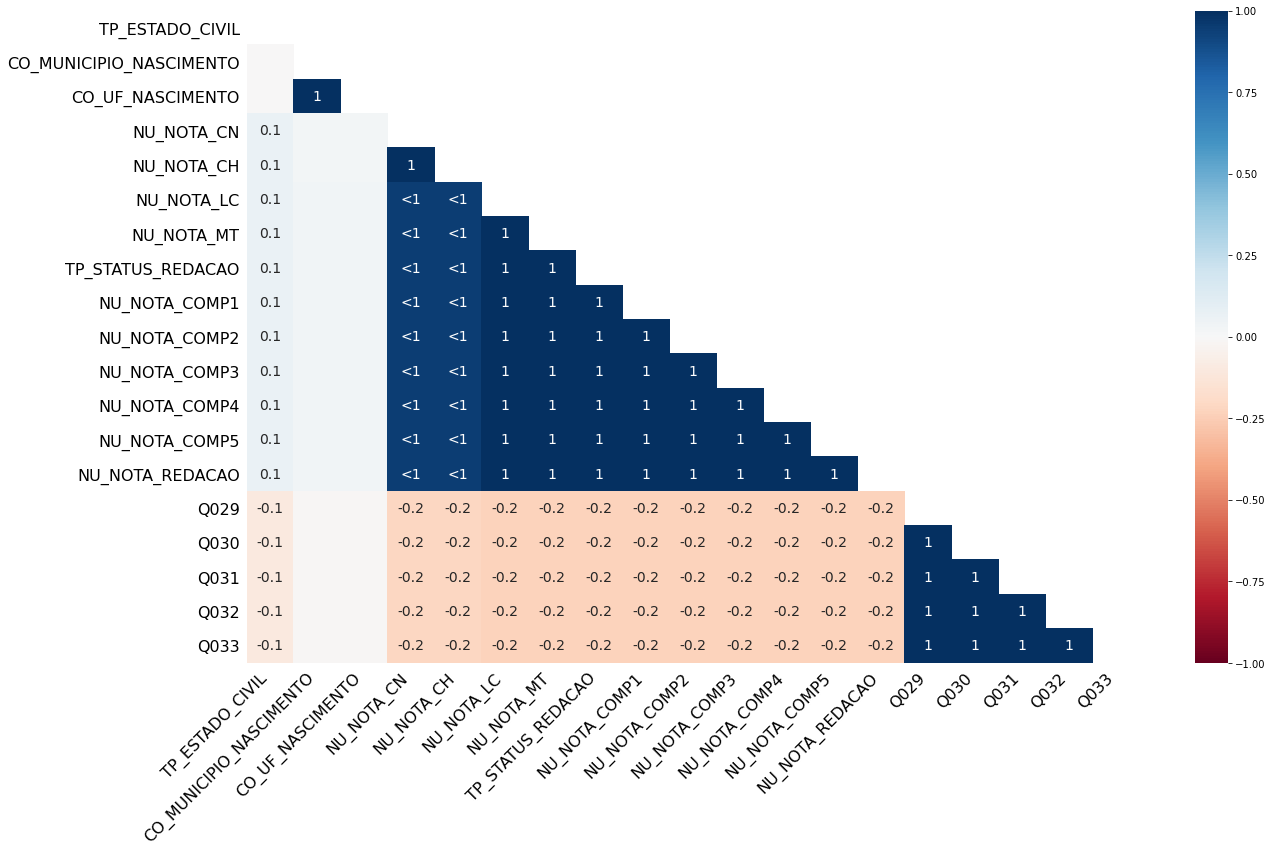

In [88]:
msn.heatmap(num_feat)